In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math
import dask
import glob

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
from dask.distributed import Client, LocalCluster
if __name__ == "__main__":
    cluster=LocalCluster(host="tcp://127.0.0.1:2411",dashboard_address="127.0.0.1:2422",n_workers=4)
    client = Client(cluster)

In [3]:
x = xr.open_dataset('../FRONT_FILES/2deg/seasonal/NOAA_seasonal_fronts_2deg.nc')
x = x.__xarray_dataarray_variable__[1:-2] #1st and last season only 1 month of data
x = x.fillna(0)
old = x.sel(time=slice('1950','1980')).mean(dim='time')
new = x.sel(time=slice('1981','2000')).mean(dim='time')

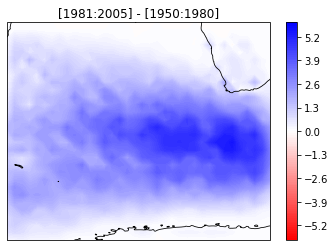

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m', linewidth=0.8)
p = ax.contourf(old.lon.values,old.lat.values,(new-old).values,transform=ccrs.PlateCarree(),cmap = 'bwr_r',levels = np.linspace(-6,6,121))
plt.colorbar(p)
plt.title('[1981:2005] - [1950:1980]')
plt.savefig('../FRONT_OUT/NOAA_old_new.png')

In [5]:
x = x.sel(lat = slice(-60,-25))
x = x.sel(lon = slice(-30,10))
x = x.sel(time = slice('1950','2005'))
#x = x.resample(time = 'A').sum(dim='time',skipna=True)
x = x.mean(dim='lon').mean(dim='lat')
NOAA = x/(np.max(x.values))

In [6]:
x = xr.open_dataset('../FRONT_FILES/2deg/seasonal/ERA5_seasonal_fronts_2deg.nc')
x = x.__xarray_dataarray_variable__[1:-2]
x = x.fillna(0)
x = x.sel(lat = slice(-60,-25))
x = x.sel(lon = slice(-30,10))
x = x.sel(time = slice('1979','2019'))
#x = x.resample(time = 'A').sum(dim='time',skipna=True)
x = x.mean(dim='lon').mean(dim='lat')
ERA = x/(np.max(x.values))

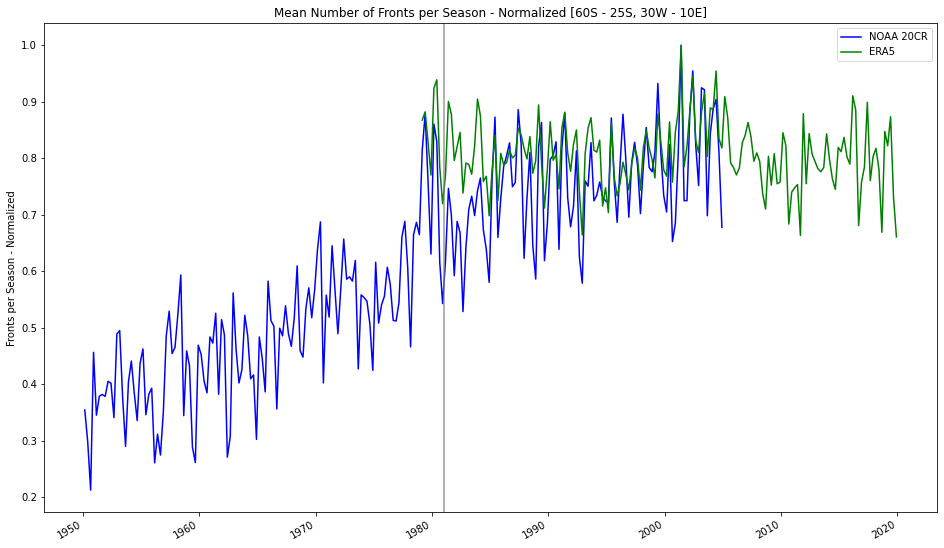

In [7]:
plt.figure(figsize=(16,9))
NOAA.plot(color='blue',label='NOAA 20CR')
ERA.plot(color='green',label='ERA5')
plt.axvline(pd.to_datetime('1981'), color = 'grey', alpha = 0.8)
plt.title('Mean Number of Fronts per Season - Normalized [60S - 25S, 30W - 10E]')
plt.ylabel('Fronts per Season - Normalized')
plt.xlabel('')
plt.legend()
plt.savefig('../FRONT_OUT/NOAA_ERA5_timeseries.png')

In [8]:
client.close()